In [1]:
import pandas as pd

# Load the dataset to see the first few rows and get an overview of its structure and contents
data_path = 'Vehicle MPG - 1984 to 2023.csv'
vehicle_data = pd.read_csv(data_path)

!pip3 install tensorflow
!pip3 install numpy pandas scikit-learn tensorflow
!pip3 install distlib
!pip3 install setuptools

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Selecting a subset of columns for simplicity and handling missing values
columns_to_use = ['Model Year', 'Make', 'Engine Cylinders', 'Engine Displacement',
                  'Drive', 'Transmission', 'Vehicle Class', 'Combined MPG (Fuel Type 1)']
data_subset = vehicle_data[columns_to_use].dropna()

# Defining features and target
X = data_subset.drop('Combined MPG (Fuel Type 1)', axis=1)
y = data_subset['Combined MPG (Fuel Type 1)']

# Preprocessing categorical and numerical columns
categorical_cols = ['Make', 'Drive', 'Transmission', 'Vehicle Class']
numerical_cols = ['Model Year', 'Engine Cylinders', 'Engine Displacement']

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying transformations
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_prepared.shape, X_test_prepared.shape


((35383, 202), (8846, 202))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 321.5446 - mean_absolute_error: 8.9374 - val_loss: 79.3656 - val_mean_absolute_error: 3.1994
Epoch 2/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 75.4260 - mean_absolute_error: 4.1970 - val_loss: 72.9290 - val_mean_absolute_error: 4.8418
Epoch 3/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 74.6421 - mean_absolute_error: 4.1156 - val_loss: 67.1231 - val_mean_absolute_error: 3.6822
Epoch 4/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 54.8865 - mean_absolute_error: 3.6648 - val_loss: 79.8665 - val_mean_absolute_error: 5.8179
Epoch 5/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 52.0560 - mean_absolute_error: 4.0183 - val_loss: 39.0700 - val_mean_absolute_error: 3.0876
Epoch 6/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 41.8303 - mean_absolute_error: 3.6068 - val_loss: 30.7031 - val_mean_absolute_error: 3.2058
Epoch 7/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 29.272

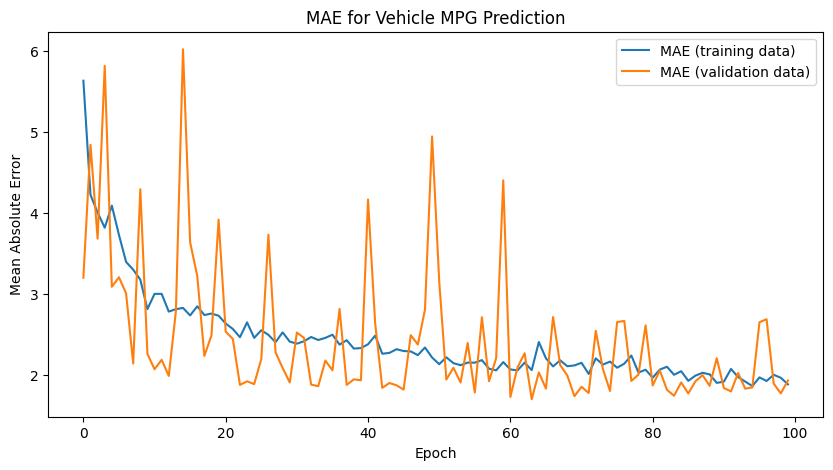

287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 12.2075 - mean_absolute_error: 1.9515
Test MAE: 1.9370349645614624


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your data
data = pd.read_csv('Vehicle MPG - 1984 to 2023.csv')

# Preprocess the data
categorical_cols = ['Make', 'Drive', 'Transmission', 'Vehicle Class']
numerical_cols = ['Model Year', 'Engine Cylinders', 'Engine Displacement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

X = data.drop('Combined MPG (Fuel Type 1)', axis=1)
y = data['Combined MPG (Fuel Type 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Define and compile the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(X_train_prepared, y_train, epochs=100, validation_split=0.2)

# Plotting the training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_absolute_error'], label='MAE (training data)')
plt.plot(history.history['val_mean_absolute_error'], label='MAE (validation data)')
plt.title('MAE for Vehicle MPG Prediction')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_prepared, y_test)
print(f'Test MAE: {test_mae}')


In [17]:
# Example new data (make sure to include all features except the target 'Combined MPG (Fuel Type 1)')
new_data = pd.DataFrame({
    'Model Year': [2023],
    'Make': ['Ferrari'],
    'Engine Cylinders': [8],
    'Engine Displacement': [2.5],
    'Drive': ['Front-Wheel Drive'],
    'Transmission': ['Automatic'],
    'Vehicle Class': ['Compact']
})

# Preprocess the new data using the same preprocessor fitted on the training data
new_data_prepared = preprocessor.transform(new_data)

# Predict using the trained model
predicted_mpg = model.predict(new_data_prepared)
print(f'Predicted Combined MPG (Fuel Type 1): {predicted_mpg[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Combined MPG (Fuel Type 1): [19.775951]
